# Simple Test File of potpurri3D
**NOTE** This only works with Python versions between 3.5-3.9 because of the dependency on polyscope.

## Import libraries

In [1]:
import potpourri3d as pp3d
import polyscope as ps
import numpy as np

## Start Polyscope to visualize the mesh

In [2]:
ps.init()

## Import in a sphere
The sphere is 1 meter in radius and subdivided 3 times

In [3]:
V, F = pp3d.read_mesh("../Models/\Sphere.obj")

In [4]:
V.shape[0] * 2

63492

In [5]:
F.shape # Make sure the faces are triangles (Nx3 array)

(63488, 3)

## Add the surface mesh to Polyscope

In [6]:
ps_mesh = ps.register_surface_mesh("mesh", V, F)

## Set up a stateful solver and find the distances from three random verticies
This is much faster on repeated computations

In [7]:
solver = pp3d.MeshHeatMethodDistanceSolver(V,F)
source_verticies = np.round(np.random.rand(3)* V.shape[0]).tolist()
source_verticies = [int(i) for i in source_verticies]
print(source_verticies)
dist = solver.compute_distance_multisource(source_verticies)

[22176, 6458, 3494]


## Add the distances to the mesh

In [8]:
ps_mesh.add_scalar_quantity("dist", dist, enabled = True)

## Find paths between source points above

In [9]:
# Flip geodesics
path_solver = pp3d.EdgeFlipGeodesicSolver(V,F)

path_a_points = path_solver.find_geodesic_path(source_verticies[0], source_verticies[1])
path_b_points = path_solver.find_geodesic_path(source_verticies[1], source_verticies[2])
path_c_points = path_solver.find_geodesic_path(source_verticies[2], source_verticies[0])

## Add paths to the visualization

In [10]:
ps.register_curve_network("path a", path_a_points, edges='line')
ps.register_curve_network("path b", path_b_points, edges='line')
ps.register_curve_network("path c", path_c_points, edges='line')

## Show the visualization

In [11]:
ps.show()

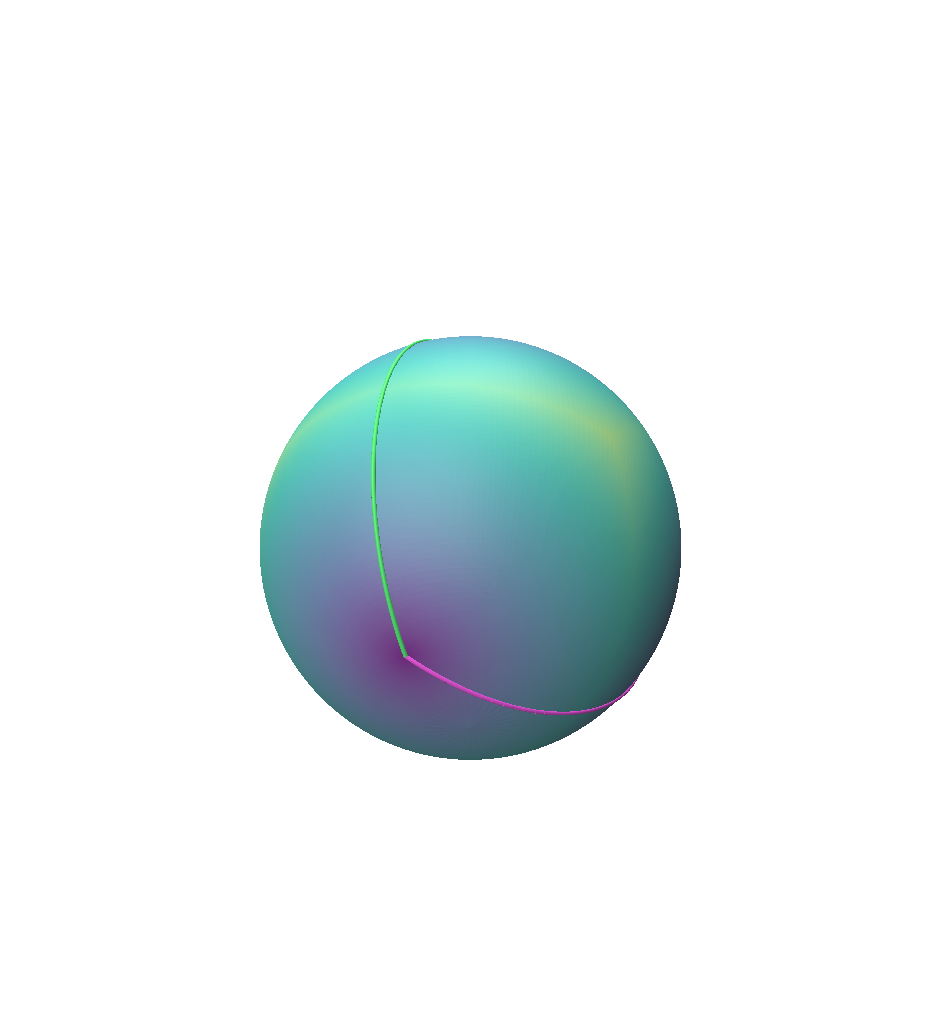